# Improved Novel Enhanced Quantum Representation (INEQR)

The Improved Novel Enhanced Quantum Representation (INEQR) method was introduced to improve the existing NEQR method and support encoding of non-square images with unequal horizontal ($2^{n_1}$) and vertical ($2^{n_2}$) dimensions.

QIR Method | Qubit Req. | Image Size | Intensity Range | Position Encoding | Color Encoding |
|----------|------------|------------|-----------------|-------------------|----------------|
|INEQR|$n_1 + n_2 + q$|$2^{n_1} \times 2^{n_2}$|$[0, 2^q - 1]$|Basis Encoding|Basis Encoding|

***

INEQR supports representation of grayscale images of dimensions $2^{n_1} \times 2^{n_2}$, given as,

\begin{equation}
    |I\rangle = \frac{1}{2^{\frac{n_1 + n_2}{2}}} \sum_{Y=0}^{2^{n_1} - 1} \sum_{X=0}^{2^{n_2} - 1} |f(Y, X)\rangle |YX\rangle = \frac{1}{2^{\frac{n_1 + n_2}{2}}} \sum_{Y=0}^{2^{n_1} - 1} \sum_{X=0}^{2^{n_2} - 1} \bigotimes_{i = 0}^{q-1} |C_{YX}^{i}\rangle |YX\rangle
\end{equation}

Where, 

\begin{equation}
    |YX\rangle = |y_0 y_1\dots y_{n_1 - 1}\rangle |x_0 x_1\dots x_{n_2 - 1}\rangle \quad \text{and} \quad y_i, x_i \in \{ 0, 1\}
\end{equation}

$x_i, y_i$ represent the binary bits of the pixel values. For grayscale images, pixel values are in the range $[0, 2^q - 1]$, where $q = 8$.

**Limitations**: Does not support encoding of colored images.

### INEQR encoding with _piQture_

In [1]:
import torch
from piqture.data_loader.mnist_data_loader import load_mnist_dataset
from piqture.embeddings.image_embeddings.ineqr import INEQR

#### Loading MNIST data

In [2]:
# Resize images to 2x2
img_size = 2
train_dataset, test_dataset = load_mnist_dataset(img_size)

# Retrieve a single image from the dataset
image, label = train_dataset[187]
image_size = tuple(image.squeeze().size())

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to data/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to data/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/mnist_data/MNIST/raw



In [3]:
# Change pixel values from tensor to list
pixel_vals = (image * 255).round().to(torch.uint8)
pixel_vals = pixel_vals.tolist()
print("Label: ", label, "\nPixel values: ", pixel_vals)

Label:  2 
Pixel values:  [[[53, 67], [74, 60]]]


#### Building the circuit

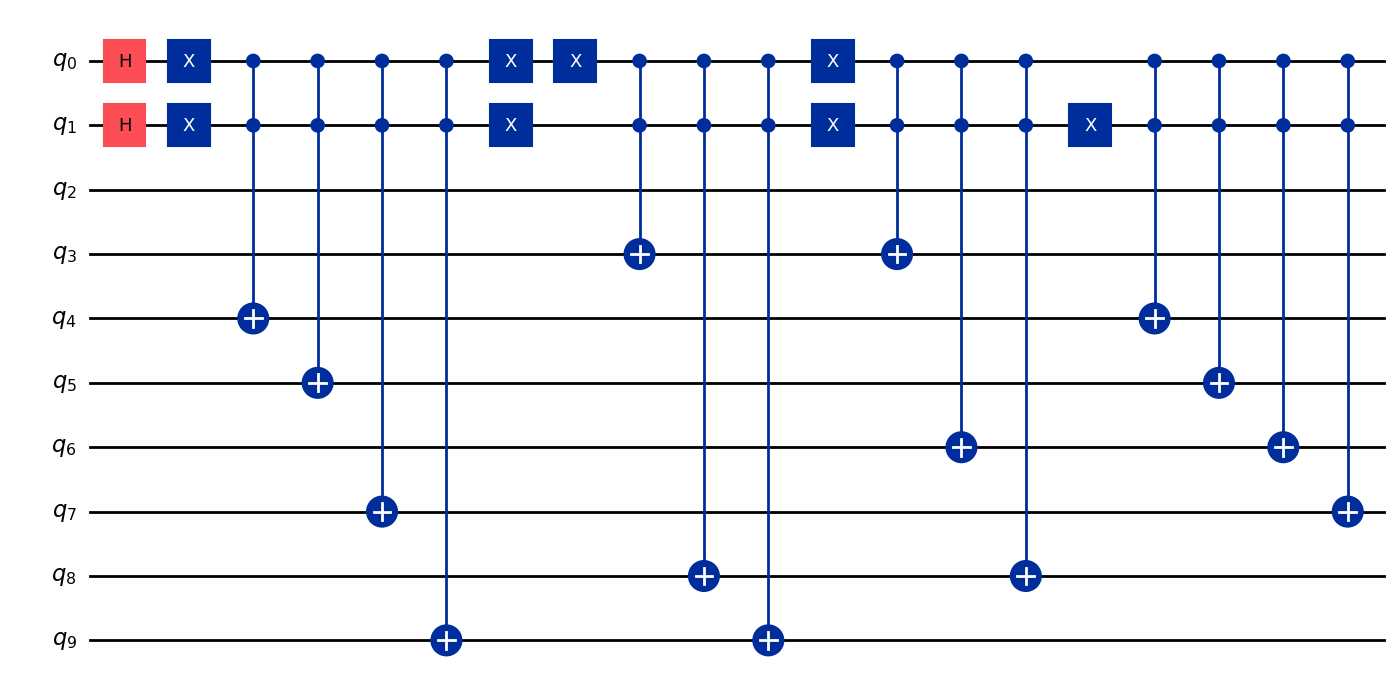

In [4]:
embedding = INEQR(image_size, pixel_vals).ineqr()
embedding.draw("mpl", style="iqp")